In [0]:
import os
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
data = os.path.join('/content/drive/My Drive/ML data')
train_dataset = pd.read_csv(data+'/google_stock_train.csv')
test_dataset = pd.read_csv(data+'/google_stock_test.csv')

#train_dataset = train_dataset.iloc[:1180]

train_data = train_dataset.iloc[:, 1:2].values

In [0]:
sc = MinMaxScaler(feature_range = (0, 1))
train_data_scaled = sc.fit_transform(train_data)

In [0]:
X_train = []
y_train = []

for i in range(60, len(train_data_scaled)):
  X_train.append(train_data_scaled[i-60:i, 0])
  y_train.append(train_data_scaled[i, 0])
  
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences = True, input_shape = (X_train.shape[1],1)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(50, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(50, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(1)
])

W0730 07:25:57.379660 140294122641280 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

W0730 07:25:58.701758 140294122641280 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
2205/2205 [==============================] - 16s 7ms/sample - loss: 0.0213
Epoch 2/100
2205/2205 [==============================] - 13s 6ms/sample - loss: 0.0031
Epoch 3/100
2205/2205 [==============================] - 14s 6ms/sample - loss: 0.0030
Epoch 4/100
2205/2205 [==============================] - 14s 6ms/sample - loss: 0.0030
Epoch 5/100
2205/2205 [==============================] - 14s 6ms/sample - loss: 0.0026
Epoch 6/100
2205/2205 [==============================] - 14s 6ms/sample - loss: 0.0025
Epoch 7/100
2205/2205 [==============================] - 14s 6ms/sample - loss: 0.0023
Epoch 8/100
2205/2205 [==============================] - 14s 6ms/sample - loss: 0.0024
Epoch 9/100
2205/2205 [==============================] - 14s 6ms/sample - loss: 0.0022
Epoch 10/100
2205/2205 [==============================] - 14s 6ms/sample - loss: 0.0024
Epoch 11/100
2205/2205 [==============================] - 14s 6ms/sample - loss: 0.0022
Epoch 12/100
2205/2205 [=================

In [0]:
real_data = test_dataset.iloc[:, 1:2].values

In [0]:
total_data = pd.concat((train_dataset['Open'], test_dataset['Open']), axis=0)
inputs = total_data[len(total_data)-len(test_dataset)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [0]:
X_test = []
for i in range(60,len(inputs)+1):
  X_test.append(inputs[i-60:i, 0])
  
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predict_data = model.predict(X_test)
predict_data = sc.inverse_transform(predict_data)

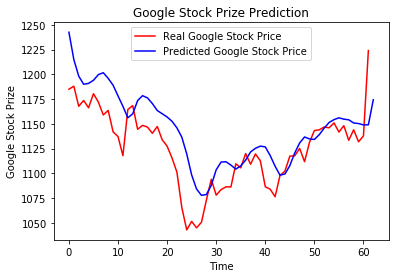

In [0]:
plt.plot(real_data, color="red", label="Real Google Stock Price")
plt.plot(predict_data, color="blue", label="Predicted Google Stock Price")
plt.title("Google Stock Prize Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Prize")
plt.legend()
plt.show()

[[1166.6189]
 [1157.246 ]
 [1149.4913]
 [1156.4635]
 [1176.6598]
 [1193.8055]
 [1200.9318]
 [1197.3096]
 [1191.6189]
 [1190.6932]
 [1198.995 ]
 [1212.5798]
 [1215.0022]
 [1210.5038]
 [1201.5466]
 [1190.6492]
 [1184.4543]
 [1186.555 ]
 [1195.7504]
 [1208.171 ]
 [1216.2538]
 [1220.6533]
 [1219.4479]
 [1212.5449]
 [1206.9614]
 [1206.0363]
 [1210.099 ]
 [1217.5248]
 [1225.5575]
 [1232.6646]
 [1238.0376]
 [1239.4532]
 [1242.4746]
 [1249.5656]
 [1256.3895]
 [1261.4246]
 [1265.1661]
 [1242.544 ]
 [1215.0127]
 [1198.1932]
 [1189.9954]
 [1190.892 ]
 [1194.013 ]
 [1199.7671]
 [1201.653 ]
 [1196.005 ]
 [1189.0021]
 [1178.2522]
 [1167.7072]
 [1156.1643]
 [1160.1957]
 [1173.5392]
 [1178.4895]
 [1176.2406]
 [1170.5007]
 [1163.4751]
 [1160.2262]
 [1156.9507]
 [1152.6207]
 [1145.9692]
 [1136.5409]
 [1119.6731]
 [1098.4552]
 [1084.1919]
 [1077.7753]
 [1078.598 ]
 [1087.9913]
 [1103.6179]
 [1111.4597]
 [1111.7471]
 [1108.3672]
 [1104.3043]
 [1107.6002]
 [1113.3875]
 [1121.6345]
 [1125.3424]
 [1127.5173]

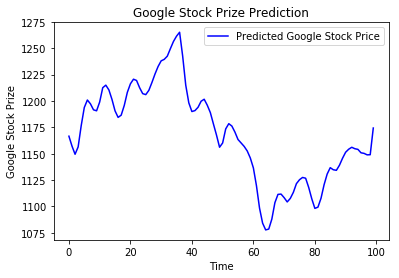

In [0]:
a=0
for j in range(100):
  test = total_data[-60-a:].values
  test = test.reshape(-1,1)
  test = sc.transform(test)
  #print(test)

  X_test = []

  for i in range(60,len(test)+1):
    X_test.append(test[i-60:i, 0])
  
  X_test = np.array(X_test)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  predict_data = model.predict(X_test)
  #print(predict_data)
  test = np.concatenate((test, predict_data), axis=0)
  #print(test)
  predict_data = sc.inverse_transform(predict_data)
  #print(predict_data)
  a+=1

print(predict_data)
print(total_data[-61:-60].values)
test = sc.inverse_transform(test)
print(len(test))
#plt.plot(real_data, color="red", label="Real Google Stock Price")
plt.plot(predict_data, color="blue", label="Predicted Google Stock Price")
plt.title("Google Stock Prize Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Prize")
plt.legend()
plt.show()